<a href="https://colab.research.google.com/github/muhammadanas25/Stock_trend_prediction/blob/main/Copy_of_Ensemble_model_(Adb_%2BRF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Initial imports
import pandas as pd
!pip install path
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
# Initial imports
import pandas as pd
import numpy as np
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

from sklearn.compose import make_column_selector as selector


In [26]:
# Loading data
file_path = Path("IBM.csv")

df = pd.read_csv(file_path)
df=df[df.FutureTrend !='Neutral']
df.dropna(inplace=True)
df.tail()

,Date,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,FutureTrend
749,23/06/2021,146.429993,146.500000,144.570007,144.610001,3202600,0.020722,-1.242909,Negative,Positive,Negative,0,Negative
750,24/06/2021,145.800003,146.190002,144.690002,145.440002,3609700,0.500000,-0.246914,Negative,Negative,Negative,0,Negative
751,25/06/2021,145.380005,146.929993,144.949997,146.839996,3594200,0.954547,1.004259,Positive,Negative,Positive,0,Positive
752,28/06/2021,147.009995,147.300003,144.910004,145.289993,3888900,0.158992,-1.169989,Negative,Positive,Negative,0,Negative
753,29/06/2021,145.259995,146.740005,145.100006,145.550003,2428500,0.274388,0.199648,Negative,Negative,Positive,0,Negative


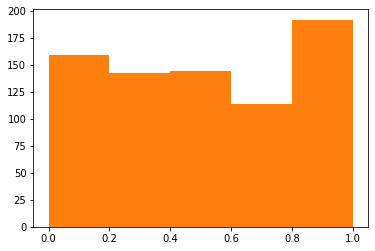

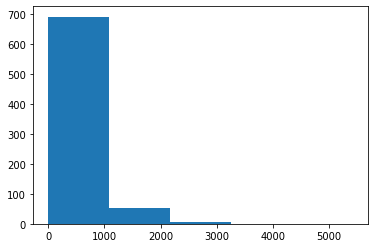

[   0.         1807.66666667 3615.33333333 5423.        ]


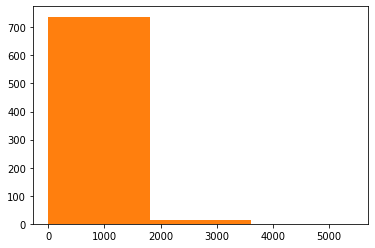

In [27]:


import matplotlib.pyplot as plt
mpgs = df['EF_1']
plt.hist(mpgs, bins=5)
ef1_cut=plt.hist(mpgs, bins=5)[1]
plt.show()
import matplotlib.pyplot as plt
mpgs = df['Twitter Sentiments']
plt.hist(mpgs, bins=5)
plt.show()
twitter_cut=plt.hist(mpgs, bins=3)[1]
print(plt.hist(mpgs, bins=3)[1]
)




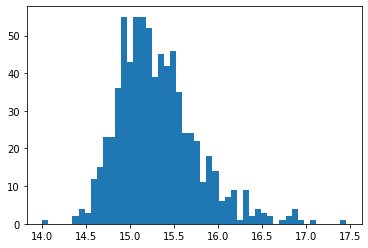

[13.99958059 15.15130918 16.30303778 17.45476638]


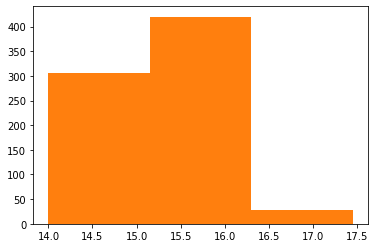

In [28]:


import matplotlib.pyplot as plt
mpgs = np.log(df['Volume'])
plt.hist(mpgs, bins=50)
plt.show()
twitter_cut=plt.hist(mpgs, bins=3)[1]
print(plt.hist(mpgs, bins=3)[1]
)



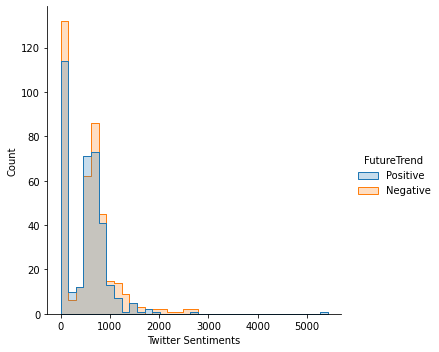

In [29]:
import seaborn as sns
sns.displot(df, x="Twitter Sentiments", hue="FutureTrend",element="step")

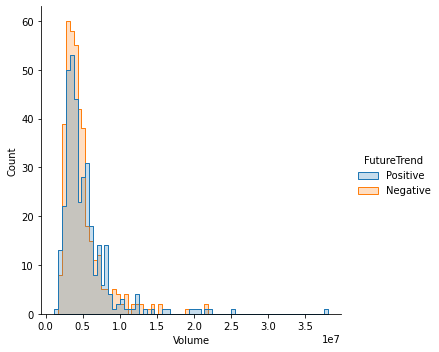

In [30]:
import seaborn as sns
sns.displot(df, x="Volume", hue="FutureTrend",element="step",)

array([13.99958059, 15.15130918, 16.30303778, 17.45476638])

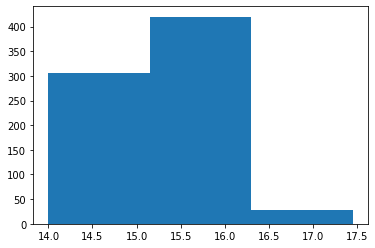

In [31]:
plt.hist(mpgs, bins=3)[1]

In [32]:
def make_bins(df):
   label_names = ["Ef_1_v_low","Ef_1_low","Ef_1_v_med","Ef1_high", "Ef1_very_high" ]
   cut_points =ef1_cut
   df["EF_1_val"] = pd.cut(df["EF_1"], cut_points, labels=label_names)
   dummies = pd.get_dummies(df["EF_1_val"],drop_first=True)
   df = pd.concat([df, dummies], axis=1)
   label_names = ["setinent_neutral","sentiment_good","sentiment_bad"]
   cut_points =twitter_cut
   df["sentiments"]=pd.cut(df['Twitter Sentiments'], cut_points, labels=label_names)
   dummies1 = pd.get_dummies(df["sentiments"],drop_first=True)
   df = pd.concat([df, dummies1], axis=1)
   df.drop(["EF_1_val","sentiments"],axis=1,inplace=True)
   return df
def calculate_ema(prices, days, smoothing=2):
      ema = [sum(prices[:days]) / days]
      for price in prices[days:]:
          ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
      return ema

In [33]:
target=df['FutureTrend']
df=df.drop("FutureTrend",axis =1)
target= target.replace(['Negative','Positive',  'Neutral'],[0,1,2])
df= df.replace(['Negative','Positive',  'Neutral'],[0,1,2])

appl_df =df.set_index('Date',inplace=True)
appl_df = make_bins(df)
appl_df.head(2)
appl_df=appl_df.drop(["Twitter Sentiments"],axis =1)
appl_df['diff']=appl_df['Close']-appl_df['Open']
appl_df['10day']=appl_df['Close'].rolling(10).mean()
appl_df['10day'].fillna(appl_df['10day'][9],inplace=True)
appl_df['Volume']=np.log(appl_df['Volume'])
ema = calculate_ema(appl_df['Close'], 10)
appl_df=appl_df[9:]
target=target[9:]
appl_df['ema']=ema
appl_df['signal']=appl_df['ema']>appl_df['Close']

del (appl_df['Open'])
del (appl_df['Close'])
del (appl_df['High'])
del (appl_df['EF_2'])

from imblearn.over_sampling import SMOTE
# pd.DataFrame(oe_df)
oversample = SMOTE()
appl_df, target = oversample.fit_resample(appl_df, target)


In [34]:
from sklearn.ensemble import AdaBoostClassifier
new_df=appl_df
print(new_df.head(2))

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(new_df)
categorical_columns = categorical_columns_selector(new_df)
print(categorical_columns)
preprocessor = ColumnTransformer([
  # ('one-hot-encoder', categorical_preprocessor, categorical_columns),
   ('standard-scaler', numerical_preprocessor, numerical_columns)
    ])
new_df=preprocessor.fit_transform(new_df)
X_train,X_test, y_train, y_test = train_test_split(new_df, target, test_size=0.2,random_state=42)

                        

          Low     Volume      EF_1  Oil FutureTrend  Gold FutureTrend  Trend  \
0  144.210007  15.059319  0.791146                0                 1      0   
1  143.339996  15.444104  0.090367                0                 0      0   

   Ef_1_low  Ef_1_v_med  Ef1_high  Ef1_very_high  sentiment_good  \
0         0           0         1              0               0   
1         0           0         0              0               0   

   sentiment_bad      diff       10day         ema  signal  
0              0 -0.209992  143.519000  143.519000   False  
1              0 -1.259995  143.882001  143.513728    True  
[]


In [35]:

clf = RandomForestClassifier(max_depth=3, random_state=5, warm_start=True, n_jobs=-1 )
ada = AdaBoostClassifier(base_estimator=clf, algorithm="SAMME.R", n_estimators=50, learning_rate = 0.3)
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=3, n_jobs=-1,
                                                         random_state=5,
                                                         warm_start=True),
                   learning_rate=0.3)

In [36]:
print("Accuracy score (training): {0:.3f}".format(
        ada.score(
            X_train, 
            y_train)))
print("Accuracy score (validation): {0:.3f}".format(
        ada.score(
            X_test, 
            y_test)))

Accuracy score (training): 0.895
Accuracy score (validation): 0.563


In [37]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(ada, parameters, cv=5, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=3,
                                                                                n_jobs=-1,
                                                                                random_state=5,
                                                                                warm_start=True),
                                          learning_rate=0.3),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20]},
             verbose=1)

In [38]:
print("best estimator is ,",clf.best_estimator_,"\nbest score is " ,clf.best_score_)

best estimator is , AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(max_depth=3, n_jobs=-1,
                                                         random_state=5,
                                                         warm_start=True),
                   learning_rate=1.02, n_estimators=2) 
best score is  0.6018793650793651


In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

  
seed = 8
kfold = model_selection.KFold(n_splits = 5,
                       )
  

# no. of base classifier
num_trees = 500
for num_trees in [5,10,15]:
# bagging classifier
  model_3 = BaggingClassifier(base_estimator = ada,
                            n_estimators = num_trees,
                            random_state = seed)
  X_train,X_test, y_train, y_test = train_test_split(new_df, target, test_size=0.2, random_state=42)

  model_3.fit(X_train,y_train)
  print("Accuracy score (training): {0:.3f}".format(
        model_3.score(
            X_train, 
            y_train)))
  print("Accuracy score (validation): {0:.3f}".format(
        model_3.score(
            X_test, 
            y_test)))
  # results = model_selection.cross_val_score(model_3, X_train, y_train, cv = kfold)
  # print("accuracy :")
  # print("num_trees :",num_trees,results.mean())

Accuracy score (training): 0.842
Accuracy score (validation): 0.570


Hyper parameter tuning on Bagging + Ensemble classifier (took too much time)

In [ ]:
# param_grid = {
#     'base_estimator__max_depth' : [1, 2, 3, 4, 5],
#     'max_samples' : [0.05, 0.1, 0.2, 0.5],
#     'n_estimators' : [5,10,20,40,60],
#     'bootstrap' :[True,False]

# }


# #Fitting Bagging Classifier model with  hyper parameters
# # bagg = BaggingClassifier(bootstrap=True,n_estimators=200)
# # gridbag = GridSearchCV(bagg, param_grid=param_grid, cv = 3, verbose = 1)
# # bestbag = gridbag.fit(X_train, y_train)

# gridbag = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
#                                      n_estimators = 250, max_features = 0.5),
#                    param_grid)
# gridbag.fit(X_train, y_train)
# print("Accuracy score (training): {0:.3f}".format(
#         gridbag.score(
#             X_train, 
#             y_train)))
# print("Accuracy score (validation): {0:.3f}".format(
#         gridbag.score(
#             X_test, 
#             y_test)))


In [ ]:
# #Printing the best hyperparameters
# print('The best hyper parameters are:\n',gridbag.best_params_)



# #Checking different metrics for bagging model after tuning the hyperparameters
# print('Checking with the best hyper parameter on bagging model after tuning the hyperparameters:\n')

# bestbag=BaggingClassifier(bootstrap= False, max_samples=0.5, n_estimators= 40,max_features=0.6
#                           ,random_state=45
#                           )
# bestbag.fit(X_train,y_train)
# print("Accuracy score (training): {0:.3f}".format(
#         bestbag.score(
#             X_train, 
#             y_train)))
# print("Accuracy score (validation): {0:.3f}".format(
#         bestbag.score(
#             X_test, 
#             y_test)))
